<a href="https://colab.research.google.com/github/parment1/CAS-Advanced-Data-Science-/blob/main/project_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## CAS ADS M6
2022-03-09
Stefan Reinhard
Thomas Parmentier

In [ ]:
import numpy as np
import csv
import pandas as pd
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import utils
import platform
import seaborn as sns
print (platform.machine())

x86_64


In [ ]:
#setup data
x = []
y = []
with open('spambase.data', 'rt') as csvfile:
    data = csv.reader(csvfile, delimiter=',')
    for raw in data:
        x.append(np.array(raw[:-1], dtype=np.float32))
        y.append(int(raw[-1]))

X = np.array(x)
y = np.array(y)

n_ch = X.shape[-1]
#Importing columns names
colums=[]

with open('spambase.names',"r") as doc:
    lines=doc.readlines()
    for line in lines :
        colums.append(line.split(":")[0])
print(colums)

#normalize inputs
for ch in range(n_ch):
    ch_v = X[:, ch]
    norm = ch_v.max()
    X[:, ch] /= norm

print(X.shape, y.shape)
print(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=1, stratify=y, shuffle=True)



['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d', 'word_freq_our', 'word_freq_over', 'word_freq_remove', 'word_freq_internet', 'word_freq_order', 'word_freq_mail', 'word_freq_receive', 'word_freq_will', 'word_freq_people', 'word_freq_report', 'word_freq_addresses', 'word_freq_free', 'word_freq_business', 'word_freq_email', 'word_freq_you', 'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000', 'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george', 'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet', 'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85', 'word_freq_technology', 'word_freq_1999', 'word_freq_parts', 'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting', 'word_freq_original', 'word_freq_project', 'word_freq_re', 'word_freq_edu', 'word_freq_table', 'word_freq_conference', 'char_freq_;', 'char_freq_(', 'char_freq_[', 'char_freq_!', 'char_freq_$', 'char_freq_#', 'capita

# 1 Data analysis and descriptive statistics 



In [ ]:
#Combined the data with labels, and check if there is any na / null

df_combined=pd.read_csv('spambase.data',names=colums)
df_describe = df_combined.describe().round(3)
print(df_combined.isna().any().any())
print(df_combined.isnull().any().any())
for col in df_combined.columns:
    print(col)

False
False
word_freq_make
word_freq_address
word_freq_all
word_freq_3d
word_freq_our
word_freq_over
word_freq_remove
word_freq_internet
word_freq_order
word_freq_mail
word_freq_receive
word_freq_will
word_freq_people
word_freq_report
word_freq_addresses
word_freq_free
word_freq_business
word_freq_email
word_freq_you
word_freq_credit
word_freq_your
word_freq_font
word_freq_000
word_freq_money
word_freq_hp
word_freq_hpl
word_freq_george
word_freq_650
word_freq_lab
word_freq_labs
word_freq_telnet
word_freq_857
word_freq_data
word_freq_415
word_freq_85
word_freq_technology
word_freq_1999
word_freq_parts
word_freq_pm
word_freq_direct
word_freq_cs
word_freq_meeting
word_freq_original
word_freq_project
word_freq_re
word_freq_edu
word_freq_table
word_freq_conference
char_freq_;
char_freq_(
char_freq_[
char_freq_!
char_freq_$
char_freq_#
capital_run_length_average
capital_run_length_longest
capital_run_length_total
class


In [ ]:
#have much higher values (means = 52, 283 etc.) than most other columns which represent fraction of word occurrences (no. of times word appears in email/total no. of words in email)
df_combined.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


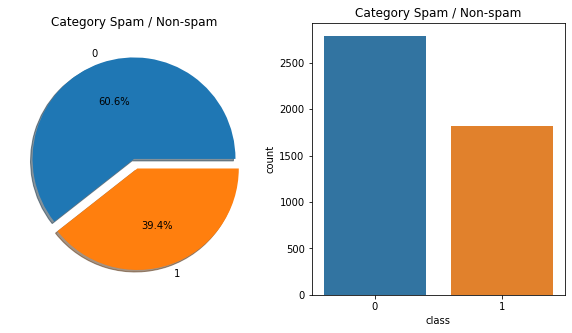

In [ ]:
#To show the distribution of spam data
f,ax=plt.subplots(1,2,figsize=(10,5))
df_combined['class'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Category Spam / Non-spam')
ax[0].set_ylabel('')
sns.countplot('class',data=df_combined,ax=ax[1])
ax[1].set_title('Category Spam / Non-spam')
plt.show()

# 2 Random model

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 32)                1856      
                                                                 
 dense_4 (Dense)             (None, 16)                528       
                                                                 
 dense_5 (Dense)             (None, 1)                 17        
                                                                 
Total params: 2,401
Trainable params: 2,401
Non-trainable params: 0
_________________________________________________________________


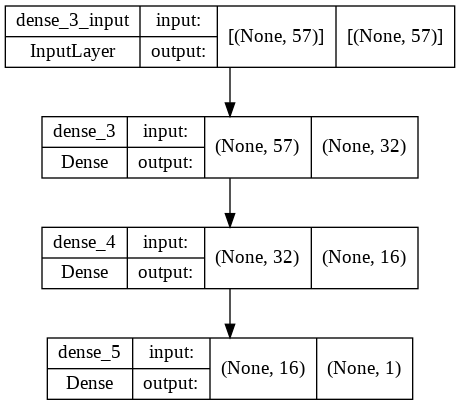

In [ ]:
model = Sequential()
M = 32
model.add(Dense(M,activation='relu', input_shape=(X.shape[1],)))
model.add(Dense(M/2,activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer=Adam(learning_rate=0.1), loss='binary_crossentropy', metrics=['accuracy'])
model.summary()
utils.plot_model(model, show_shapes=True)

Epoch 1/20
115/115 [==============================] - 1s 4ms/step - loss: 0.2677 - accuracy: 0.8927 - val_loss: 0.2404 - val_accuracy: 0.9207
Epoch 2/20
115/115 [==============================] - 0s 2ms/step - loss: 0.2124 - accuracy: 0.9245 - val_loss: 0.2086 - val_accuracy: 0.9218
Epoch 3/20
115/115 [==============================] - 0s 3ms/step - loss: 0.1858 - accuracy: 0.9326 - val_loss: 0.1999 - val_accuracy: 0.9327
Epoch 4/20
115/115 [==============================] - 0s 2ms/step - loss: 0.1771 - accuracy: 0.9380 - val_loss: 0.2074 - val_accuracy: 0.9338
Epoch 5/20
115/115 [==============================] - 0s 2ms/step - loss: 0.1659 - accuracy: 0.9410 - val_loss: 0.2602 - val_accuracy: 0.9110
Epoch 6/20
115/115 [==============================] - 0s 2ms/step - loss: 0.1739 - accuracy: 0.9397 - val_loss: 0.1858 - val_accuracy: 0.9359
Epoch 7/20
115/115 [==============================] - 0s 2ms/step - loss: 0.1621 - accuracy: 0.9416 - val_loss: 0.2066 - val_accuracy: 0.9251
Epoch 

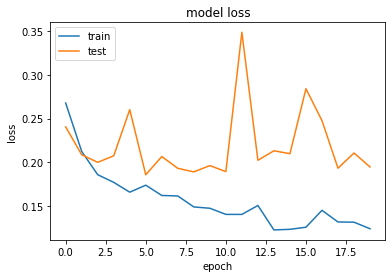

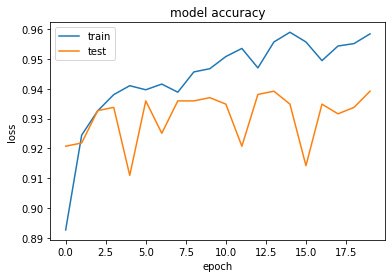

In [ ]:
custom_early_stopping = EarlyStopping(
    monitor='val_accuracy', 
    patience=10, 
    min_delta=0.0001, 
    mode='max'
)

history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), callbacks=[custom_early_stopping])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# 3. Grid search hyperparameter

### 3.1 Batch size and epochs
https://machinelearningmastery.com/grid-search-hyperparameters-deep-learning-models-python-keras/

In [ ]:
# Function to create model, required for KerasClassifier
def create_model():
    # create model
    model = Sequential()
    model.add(Dense(8,activation='relu', input_shape=(X.shape[1],)))
    model.add(Dense(4,activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
    return model

model = KerasClassifier(build_fn=create_model, verbose=0)
# define the grid search parameters
batch_size = [16,32,64,128]
epochs = [10,20, 50, 100]
param_grid = dict(batch_size=batch_size, epochs=epochs)
stopper = EarlyStopping(monitor='val_acc', patience=3, verbose=1)
fit_params = dict(callbacks=[stopper])
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train, y_train, validation_data=(X_test, y_test))
grid_result1 = grid_result
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  # This is added back by InteractiveShellApp.init_path()


Best: 0.935325 using {'batch_size': 16, 'epochs': 100}
0.920107 (0.005303) with: {'batch_size': 16, 'epochs': 10}
0.930164 (0.004213) with: {'batch_size': 16, 'epochs': 20}
0.934784 (0.003027) with: {'batch_size': 16, 'epochs': 50}
0.935325 (0.002360) with: {'batch_size': 16, 'epochs': 100}
0.900000 (0.011018) with: {'batch_size': 32, 'epochs': 10}
0.925271 (0.004072) with: {'batch_size': 32, 'epochs': 20}
0.933152 (0.003045) with: {'batch_size': 32, 'epochs': 50}
0.934784 (0.003683) with: {'batch_size': 32, 'epochs': 100}
0.886146 (0.025586) with: {'batch_size': 64, 'epochs': 10}
0.912224 (0.010050) with: {'batch_size': 64, 'epochs': 20}
0.927716 (0.002548) with: {'batch_size': 64, 'epochs': 50}
0.933423 (0.003171) with: {'batch_size': 64, 'epochs': 100}
0.844552 (0.035927) with: {'batch_size': 128, 'epochs': 10}
0.883153 (0.008203) with: {'batch_size': 128, 'epochs': 20}
0.920378 (0.006699) with: {'batch_size': 128, 'epochs': 50}
0.928531 (0.004038) with: {'batch_size': 128, 'epochs'

### 3.2  Optimizer

In [ ]:
def create_model(optimizer='adam'):
    # create model
    model = Sequential()
    model.add(Dense(8,activation='relu', input_shape=(X.shape[1],)))
    model.add(Dense(4,activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model
model = KerasClassifier(build_fn=create_model, verbose=0)
# define the grid search parameters
optimizer = ['SGD', 'Adam']
param_grid = dict(optimizer=optimizer)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train, y_train, epochs=100, batch_size=16, validation_data=(X_test, y_test))
grid_result2 = grid_result
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  if __name__ == '__main__':


Best: 0.936413 using {'optimizer': 'Adam'}
0.922282 (0.003166) with: {'optimizer': 'SGD'}
0.936413 (0.003529) with: {'optimizer': 'Adam'}


### 3.3 Learning Rate



In [ ]:
def create_model(learn_rate=0.01):
    # create model
    model = Sequential()
    model.add(Dense(8,activation='relu', input_shape=(X.shape[1],)))
    model.add(Dense(4,activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    optimizer = Adam(learning_rate=learn_rate)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model
model = KerasClassifier(build_fn=create_model, verbose=0)
# define the grid search parameters
learn_rate = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3]
param_grid = dict(learn_rate=learn_rate)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train, y_train,epochs=100, batch_size=16, validation_data=(X_test, y_test))
grid_result3 = grid_result
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  # Remove the CWD from sys.path while we load stuff.


Best: 0.934510 using {'learn_rate': 0.001}
0.920652 (0.001937) with: {'learn_rate': 0.0001}
0.934510 (0.002529) with: {'learn_rate': 0.001}
0.930707 (0.003327) with: {'learn_rate': 0.01}
0.922286 (0.009419) with: {'learn_rate': 0.1}
0.921190 (0.014711) with: {'learn_rate': 0.2}
0.820053 (0.145766) with: {'learn_rate': 0.3}


In [ ]:
print("Best: %f using %s" % (grid_result1.best_score_, grid_result1.best_params_))
print("Best: %f using %s" % (grid_result2.best_score_, grid_result2.best_params_))
print("Best: %f using %s" % (grid_result3.best_score_, grid_result3.best_params_))

Best: 0.937773 using {'batch_size': 32, 'epochs': 100}
Best: 0.936413 using {'optimizer': 'Adam'}
Best: 0.934510 using {'learn_rate': 0.001}


### 3.4 Tuned model

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 8)                 464       
                                                                 
 dense_13 (Dense)            (None, 4)                 36        
                                                                 
 dense_14 (Dense)            (None, 1)                 5         
                                                                 
Total params: 505
Trainable params: 505
Non-trainable params: 0
_________________________________________________________________


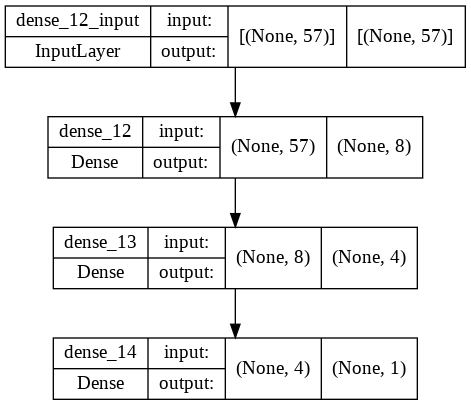

In [ ]:
model = Sequential()
model.add(Dense(8,activation='relu', input_shape=(X.shape[1],)))
model.add(Dense(4,activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
model.summary()
utils.plot_model(model, show_shapes=True)

Epoch 1/100
230/230 [==============================] - 1s 3ms/step - loss: 0.1195 - accuracy: 0.9446 - val_loss: 0.3270 - val_accuracy: 0.9229
Epoch 2/100
230/230 [==============================] - 1s 3ms/step - loss: 0.1228 - accuracy: 0.9492 - val_loss: 0.2312 - val_accuracy: 0.9273
Epoch 3/100
230/230 [==============================] - 1s 3ms/step - loss: 0.1214 - accuracy: 0.9454 - val_loss: 0.3249 - val_accuracy: 0.9349
Epoch 4/100
230/230 [==============================] - 1s 3ms/step - loss: 0.1251 - accuracy: 0.9448 - val_loss: 0.2454 - val_accuracy: 0.9316
Epoch 5/100
230/230 [==============================] - 1s 3ms/step - loss: 0.1121 - accuracy: 0.9503 - val_loss: 0.2103 - val_accuracy: 0.9305
Epoch 6/100
230/230 [==============================] - 1s 3ms/step - loss: 0.1038 - accuracy: 0.9552 - val_loss: 0.2634 - val_accuracy: 0.9273
Epoch 7/100
230/230 [==============================] - 1s 3ms/step - loss: 0.1150 - accuracy: 0.9476 - val_loss: 0.4037 - val_accuracy: 0.9305

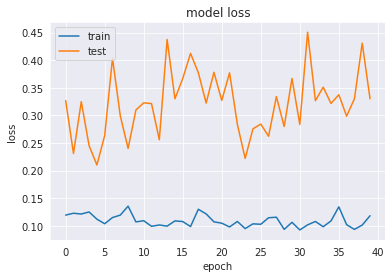

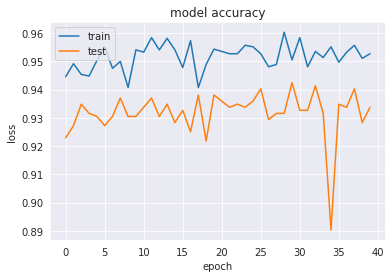

In [ ]:
history = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_data=(X_test, y_test),callbacks=[custom_early_stopping])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# 4 random parameter

### 4.1 add complexity

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 128)               7424      
                                                                 
 dense_16 (Dense)            (None, 32)                4128      
                                                                 
 dense_17 (Dense)            (None, 1)                 33        
                                                                 
Total params: 11,585
Trainable params: 11,585
Non-trainable params: 0
_________________________________________________________________


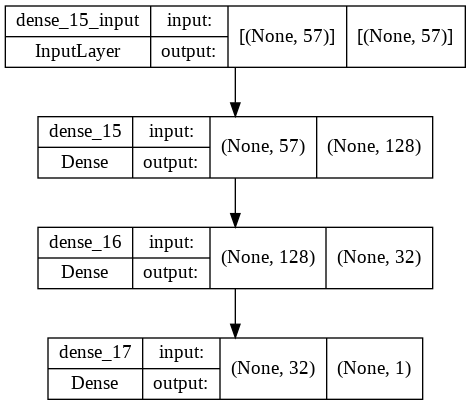

In [ ]:
model = Sequential()
model.add(Dense(128,activation='relu', input_shape=(X.shape[1],)))
model.add(Dense(32,activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
model.summary()
utils.plot_model(model, show_shapes=True)

Epoch 1/100
230/230 [==============================] - 1s 3ms/step - loss: 0.3869 - accuracy: 0.8533 - val_loss: 0.2238 - val_accuracy: 0.9338
Epoch 2/100
230/230 [==============================] - 1s 2ms/step - loss: 0.2105 - accuracy: 0.9283 - val_loss: 0.1978 - val_accuracy: 0.9359
Epoch 3/100
230/230 [==============================] - 0s 2ms/step - loss: 0.1859 - accuracy: 0.9359 - val_loss: 0.1920 - val_accuracy: 0.9370
Epoch 4/100
230/230 [==============================] - 1s 2ms/step - loss: 0.1764 - accuracy: 0.9386 - val_loss: 0.1842 - val_accuracy: 0.9370
Epoch 5/100
230/230 [==============================] - 1s 2ms/step - loss: 0.1683 - accuracy: 0.9408 - val_loss: 0.1812 - val_accuracy: 0.9403
Epoch 6/100
230/230 [==============================] - 0s 2ms/step - loss: 0.1629 - accuracy: 0.9410 - val_loss: 0.1854 - val_accuracy: 0.9294
Epoch 7/100
230/230 [==============================] - 0s 2ms/step - loss: 0.1565 - accuracy: 0.9443 - val_loss: 0.1773 - val_accuracy: 0.9392

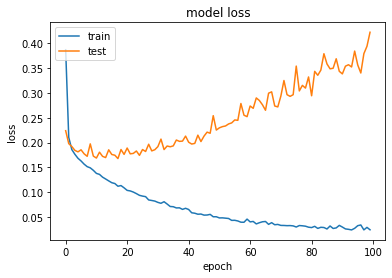

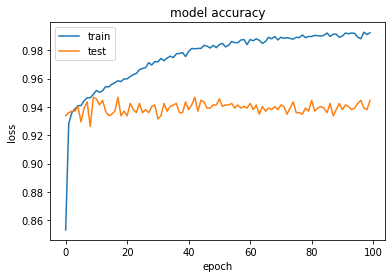

In [ ]:
history = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_data=(X_test, y_test))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### 4.2 minimize learing rate

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 8)                 464       
                                                                 
 dense_19 (Dense)            (None, 4)                 36        
                                                                 
 dense_20 (Dense)            (None, 1)                 5         
                                                                 
Total params: 505
Trainable params: 505
Non-trainable params: 0
_________________________________________________________________


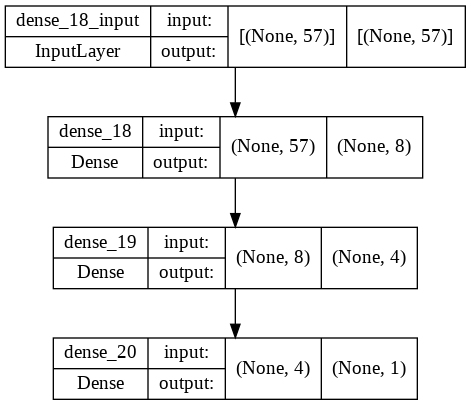

In [ ]:
model = Sequential()
model.add(Dense(8,activation='relu', input_shape=(X.shape[1],)))
model.add(Dense(4,activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])
model.summary()
utils.plot_model(model, show_shapes=True)

Epoch 1/100
230/230 [==============================] - 1s 3ms/step - loss: 0.6941 - accuracy: 0.5242 - val_loss: 0.6921 - val_accuracy: 0.5787
Epoch 2/100
230/230 [==============================] - 1s 2ms/step - loss: 0.6902 - accuracy: 0.5783 - val_loss: 0.6883 - val_accuracy: 0.5896
Epoch 3/100
230/230 [==============================] - 1s 2ms/step - loss: 0.6857 - accuracy: 0.5951 - val_loss: 0.6830 - val_accuracy: 0.6069
Epoch 4/100
230/230 [==============================] - 0s 2ms/step - loss: 0.6786 - accuracy: 0.6054 - val_loss: 0.6738 - val_accuracy: 0.6048
Epoch 5/100
230/230 [==============================] - 1s 2ms/step - loss: 0.6683 - accuracy: 0.6065 - val_loss: 0.6623 - val_accuracy: 0.6059
Epoch 6/100
230/230 [==============================] - 0s 2ms/step - loss: 0.6564 - accuracy: 0.6073 - val_loss: 0.6490 - val_accuracy: 0.6069
Epoch 7/100
230/230 [==============================] - 0s 2ms/step - loss: 0.6428 - accuracy: 0.6071 - val_loss: 0.6340 - val_accuracy: 0.6102

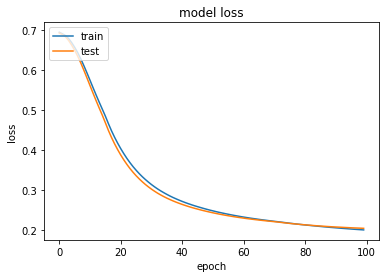

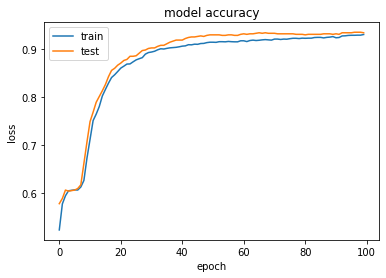

In [ ]:
history = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_data=(X_test, y_test))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### 4.3 decrease epocs

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 8)                 464       
                                                                 
 dense_22 (Dense)            (None, 4)                 36        
                                                                 
 dense_23 (Dense)            (None, 1)                 5         
                                                                 
Total params: 505
Trainable params: 505
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
230/230 [==============================] - 1s 3ms/step - loss: 0.6487 - accuracy: 0.6060 - val_loss: 0.5738 - val_accuracy: 0.6048
Epoch 2/50
230/230 [==============================] - 1s 2ms/step - loss: 0.4784 - accuracy: 0.7883 - val_loss: 0.3790 - val_accuracy: 0.8730
Epoch 3/50
230/230 [================

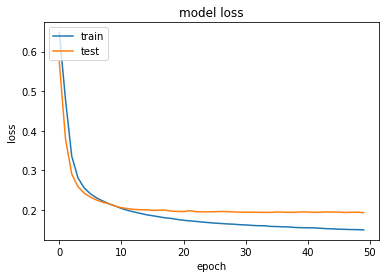

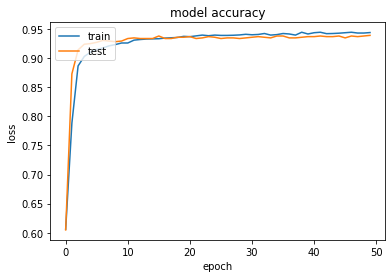

In [ ]:
model = Sequential()
model.add(Dense(8,activation='relu', input_shape=(X.shape[1],)))
model.add(Dense(4,activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
model.summary()
utils.plot_model(model, show_shapes=True)

history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### 4.4 increase batch size

In [ ]:
model = Sequential()
model.add(Dense(8,activation='relu', input_shape=(X.shape[1],)))
model.add(Dense(4,activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
model.summary()
utils.plot_model(model, show_shapes=True)

history = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_data=(X_test, y_test))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 8)                 464       
                                                                 
 dense_28 (Dense)            (None, 4)                 36        
                                                                 
 dense_29 (Dense)            (None, 1)                 5         
                                                                 
Total params: 505
Trainable params: 505
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
230/230 [==============================] - 1s 3ms/step - loss: 0.6057 - accuracy: 0.6962 - val_loss: 0.4870 - val_accuracy: 0.8306
Epoch 2/100
230/230 [==============================] - 0s 2ms/step - loss: 0.4079 - accuracy: 0.8538 - val_loss: 0.3322 - val_accuracy: 0.8969
Epoch 3/100
230/230 [=============

KeyboardInterrupt: ignored